In [3]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

# Basic Analysis

In [4]:
# df is actual dataframe to work with. ds is purely for analysis, so we can transform and modify

In [5]:
# load csv file
survey_df = pd.read_csv('./datasets/graduate employment survey modified.csv')
survey_ds = survey_df.copy()
survey_ds.head()

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile,gross_monthly_mean.1,gross_monthly_median.1,gross_mthly_25_percentile.1,gross_mthly_75_percentile.1
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000,3727,3350,2900,4000
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700,2700,2900,2938,2700,2700,2900
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000,2700,3500,3214,3000,2700,3500
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400,3000,4100,3615,3400,3000,4100
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494,3500,3536,3500,3100,3816,3536,3500,3100,3816


In [6]:
# columns of dataset
survey_ds.columns

Index(['year', 'university', 'school', 'degree', 'employment_rate_overall',
       'employment_rate_ft_perm', 'basic_monthly_mean', 'basic_monthly_median',
       'gross_monthly_mean', 'gross_monthly_median',
       'gross_mthly_25_percentile', 'gross_mthly_75_percentile',
       'gross_monthly_mean.1', 'gross_monthly_median.1',
       'gross_mthly_25_percentile.1', 'gross_mthly_75_percentile.1'],
      dtype='object')

<li>The dataset contains info about gtraduates from different universities and degrees by year, about employment rate and pay.</li>

In [7]:
survey_ds.shape

(5135, 16)

<li>There are 5135 rows and 16 columns</li>

In [8]:
pd.set_option('display.max_rows', None)
survey_ds.describe().T

,count,unique,top,freq
year,5135,12,2022,564
university,5135,7,Nanyang Technological University,1627
school,5135,71,College of Engineering,669
degree,5135,349,Economics,69
employment_rate_overall,5027,231,100,542
employment_rate_ft_perm,5027,406,na,370
basic_monthly_mean,5027,979,na,370
basic_monthly_median,5027,236,3000,541
gross_monthly_mean,5027,982,na,370
gross_monthly_median,5027,310,3500,409


<li>year, university, school, degree have no null values</li>
<li>There are 7 unique universities, 71 unique and 349 unique degrees</li>

In [9]:
pd.set_option('display.max_rows', 8)

# Further Analysis

## gross_monthly_mean and gross_monthly_mean.1
are they the same?
<ul>
    <li>From meta data they appear to be the same</li>
    <li>This also will apply to similar columns with a ".1" duplicate</li>
</ul>

In [10]:
a = np.array(survey_ds['gross_monthly_mean'].fillna(np.nan))
b = np.array(survey_ds['gross_monthly_mean.1'].fillna(np.nan))
print("Indices of differing elements:", np.where(a != b))

print("\nIndices of NaN gross_monthly_mean:", np.where(a != a)) # this is because np.nan is not equal to itself
print("Indices of NaN gross_monthly_mean.1:", np.where(b != b))

nan_rows =  np.where(a != a)

Indices of differing elements: (array([1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359,
       1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370,
       1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381,
       1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392,
       1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403,
       1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414,
       1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425,
       1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436,
       1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447,
       1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456], dtype=int64),)

Indices of NaN gross_monthly_mean: (array([1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359,
       1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370,
       1371, 1372, 1373, 1374, 1375, 1376, 1377, 13

<ul>
    <li>All three arrays above are the same</li>
    <li>Therefore, the only values where gross_monthly_mean and gross_monthly_mean.1 <strong>differ</strong> is <strong>where there are nan values</strong></li>
</ul>

In [11]:
survey_ds[['year', 'university', 'school', 'degree', 'gross_monthly_mean', 'gross_monthly_mean.1']].iloc[nan_rows]

,year,university,school,degree,gross_monthly_mean,gross_monthly_mean.1
1349,2014,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,NaN,NaN
1350,2014,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),NaN,NaN
1351,2014,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),NaN,NaN
1352,2014,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,NaN,NaN
...,...,...,...,...,...,...
1453,2014,Singapore Institute of Technology,University of Glasgow,Bachelor of Engineering with Honours in Mechat...,NaN,NaN
1454,2014,Singapore Institute of Technology,University of Manchester,Bachelor of Science with Honours in Nursing Pr...,NaN,NaN
1455,2014,Singapore Institute of Technology,"University of Nevada, Las Vegas",Bachelor of Science (Major in Hospitality Mana...,NaN,NaN
1456,2014,Singapore Institute of Technology,Wheelock College,Bachelor of Science in Early Childhood Education,NaN,NaN


<ul>
    <li>Inadvertently, this helps us unconver many values of NaN in the dataset</li>
</ul>

## NaN values of '2014'

In [12]:
# pd.set_option('display.max_rows', None) was used to view all rows
survey_ds.iloc[nan_rows]

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile,gross_monthly_mean.1,gross_monthly_median.1,gross_mthly_25_percentile.1,gross_mthly_75_percentile.1
1349,2014,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1350,2014,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1351,2014,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1352,2014,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2014,Singapore Institute of Technology,University of Glasgow,Bachelor of Engineering with Honours in Mechat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1454,2014,Singapore Institute of Technology,University of Manchester,Bachelor of Science with Honours in Nursing Pr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1455,2014,Singapore Institute of Technology,"University of Nevada, Las Vegas",Bachelor of Science (Major in Hospitality Mana...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,2014,Singapore Institute of Technology,Wheelock College,Bachelor of Science in Early Childhood Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
pd.set_option('display.max_rows', 8)

<ul>
    <li>Looking through the DataFrame all values are from '2014', with rows full of NaN values</li>
    <li>Since they offer no important insights, we can drop them</li>
</ul>

## Row 1262 and Duplicate Rows in Dataset

In [14]:
survey_ds.iloc[1262]

year                                                year
university                                    university
school                                            school
degree                                            degree
                                         ...            
gross_monthly_mean.1                  gross_monthly_mean
gross_monthly_median.1              gross_monthly_median
gross_mthly_25_percentile.1    gross_mthly_25_percentile
gross_mthly_75_percentile.1    gross_mthly_75_percentile
Name: 1262, Length: 16, dtype: object

In [15]:
survey_ds[survey_ds.year == 'year']

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile,gross_monthly_mean.1,gross_monthly_median.1,gross_mthly_25_percentile.1,gross_mthly_75_percentile.1
1262,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile


In [16]:
survey_ds.iloc[[0, 1263, 2525, 3787, 5049]]

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile,gross_monthly_mean.1,gross_monthly_median.1,gross_mthly_25_percentile.1,gross_mthly_75_percentile.1
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000,3727,3350,2900,4000
1263,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000,3727,3350,2900,4000
2525,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000,3727,3350,2900,4000
3787,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000,3727,3350,2900,4000
5049,2012,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,285,320,372.7,335,290,400,372.7,335,290,400


<li>Dataset repeats</li>
<li>Only 1262 rows of unique data</li>

In [17]:
survey_ds[survey_ds.duplicated()]

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile,gross_monthly_mean.1,gross_monthly_median.1,gross_mthly_25_percentile.1,gross_mthly_75_percentile.1
1263,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000,3727,3350,2900,4000
1264,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700,2700,2900,2938,2700,2700,2900
1265,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000,2700,3500,3214,3000,2700,3500
1266,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400,3000,4100,3615,3400,3000,4100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,2022,Singapore Institute of Technology,Technische Universität München,Bachelor of Science in Chemical Engineering,94.1,85.3,3704.482759,3600,4002.482759,3950,3600,4300,4002.482759,3950,3600,4300
5046,2022,Singapore Institute of Technology,Technische Universität München,Bachelor of Science in Electrical Engineering ...,95,85,4522.2,4200,4605.533333,4280,4000,4800,4605.533333,4280,4000,4800
5047,2022,Singapore Institute of Technology,The Culinary Institute of America,Bachelor of Business Administration in Food Bu...,89.5,78.9,2609,2450,2969,3050,2300,3500,2969,3050,2300,3500
5048,2022,Singapore Institute of Technology,University of Liverpool,Bachelor of Arts with Honours in Criminology a...,90.5,85.7,4277.888889,4050,4533.247222,4560.835,4000,5293,4533.247222,4560.835,4000,5293


In [18]:
survey_unduplicated = survey_ds.drop_duplicates()
survey_unduplicated

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile,gross_monthly_mean.1,gross_monthly_median.1,gross_mthly_25_percentile.1,gross_mthly_75_percentile.1
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000,3727,3350,2900,4000
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700,2700,2900,2938,2700,2700,2900
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000,2700,3500,3214,3000,2700,3500
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400,3000,4100,3615,3400,3000,4100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5131,2012,Singapore Management University,School of Social Sciences (4-year programme) *,Social Sciences (4-years programme),86.5,79.8,312.2,300,315,300,260,332,315,300,260,332
5132,2012,Singapore Management University,School of Social Sciences (4-year programme) *,Social Sciences (4-years programme) Cum Laude ...,87.5,83.3,325.1,320,326.7,320,280,378.1,326.7,320,280,378.1
5133,2012,Singapore Management University,School of Law (4-year programme) *,Law (4-years programme) #,100,100,502.3,480,524.6,500,450,600,524.6,500,450,600
5134,2012,Singapore Management University,School of Law (4-year programme) *,Law (4-years programme) Cum Laude and above #,100,100,532.9,500,561.7,554.7,475,640,561.7,554.7,475,640


## 2012

In [19]:
survey_2012 = survey_unduplicated[survey_unduplicated['year']=='2012']
survey_2012

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile,gross_monthly_mean.1,gross_monthly_median.1,gross_mthly_25_percentile.1,gross_mthly_75_percentile.1
5049,2012,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,285,320,372.7,335,290,400,372.7,335,290,400
5050,2012,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,285,270,293.8,270,270,290,293.8,270,270,290
5051,2012,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,305.3,300,321.4,300,270,350,321.4,300,270,350
5052,2012,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,355.7,340,361.5,340,300,410,361.5,340,300,410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5131,2012,Singapore Management University,School of Social Sciences (4-year programme) *,Social Sciences (4-years programme),86.5,79.8,312.2,300,315,300,260,332,315,300,260,332
5132,2012,Singapore Management University,School of Social Sciences (4-year programme) *,Social Sciences (4-years programme) Cum Laude ...,87.5,83.3,325.1,320,326.7,320,280,378.1,326.7,320,280,378.1
5133,2012,Singapore Management University,School of Law (4-year programme) *,Law (4-years programme) #,100,100,502.3,480,524.6,500,450,600,524.6,500,450,600
5134,2012,Singapore Management University,School of Law (4-year programme) *,Law (4-years programme) Cum Laude and above #,100,100,532.9,500,561.7,554.7,475,640,561.7,554.7,475,640


<ul>
    <li>Percentile valued columns are the same, but monetary values like basic_monthly_mean are different</li>
    <li>Hypothesis: From pure observation, when comparing to 2013, these 2012 monetary values are 10 times less than the similar rows in 2013</li>
</ul>

In [20]:
survey_2013 = survey_unduplicated[survey_unduplicated['year']=='2013']
survey_2013

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile,gross_monthly_mean.1,gross_monthly_median.1,gross_mthly_25_percentile.1,gross_mthly_75_percentile.1
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000,3727,3350,2900,4000
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700,2700,2900,2938,2700,2700,2900
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000,2700,3500,3214,3000,2700,3500
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400,3000,4100,3615,3400,3000,4100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,2013,Singapore Management University,School of Social Sciences (4-year programme) *,Social Sciences (4-years programme),86.5,79.8,3122,3000,3150,3000,2600,3320,3150,3000,2600,3320
83,2013,Singapore Management University,School of Social Sciences (4-year programme) *,Social Sciences (4-years programme) Cum Laude ...,87.5,83.3,3251,3200,3267,3200,2800,3781,3267,3200,2800,3781
84,2013,Singapore Management University,School of Law (4-year programme) *,Law (4-years programme) #,100,100,5023,4800,5246,5000,4500,6000,5246,5000,4500,6000
85,2013,Singapore Management University,School of Law (4-year programme) *,Law (4-years programme) Cum Laude and above #,100,100,5329,5000,5617,5547,4750,6400,5617,5547,4750,6400


In [21]:
# reset_index so we can compare using np
survey_2012 = survey_2012.reset_index(drop=True)
survey_2013 = survey_2013.reset_index(drop=True)
# replace 'na' string with np.nan and change all values to float (standardise)
survey_2012['gross_monthly_mean'] = survey_2012['gross_monthly_mean'].replace('na', np.nan).astype(float)
survey_2013['gross_monthly_mean'] = survey_2013['gross_monthly_mean'].replace('na', np.nan).astype(float)

col1 = survey_2012['gross_monthly_mean'][:85]
col2 = survey_2013['gross_monthly_mean']

def times_ten_test(col1, col2):
    # fillna remaining values with np.nan, make two np.arrays
    a = np.array(col1.fillna(np.nan))
    b = np.array(col2.fillna(np.nan))
    # multiply all values in np.arrays by 10
    a = a * 10
    # finds indices where two values are different
    print("Indices of differing elements:", np.where(a != b))
    
    combined_df = pd.DataFrame({2012: survey_2012['gross_monthly_mean'], 2013: survey_2013['gross_monthly_mean']})
    display(combined_df.iloc[np.where(a != b)].dropna())

times_ten_test(col1, col2)

Indices of differing elements: (array([24, 28, 42, 43, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
       59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
       76, 77, 78, 79, 80, 81, 82, 83, 84], dtype=int64),)


,2012,2013
46,391.1,3322.0
47,332.2,4106.0
50,302.3,3025.0
51,302.5,2988.0
...,...,...
81,386.2,3150.0
82,315.0,3267.0
83,326.7,5246.0
84,524.6,5617.0


<li>Through futher visual analysis, it seems like the rows are 'offset' by 1 row</li>
<li>Let us look at row 46</li>

In [22]:
survey_2012[survey_2012["gross_monthly_mean"]==391.1]

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile,gross_monthly_mean.1,gross_monthly_median.1,gross_mthly_25_percentile.1,gross_mthly_75_percentile.1
46,2012,Nanyang Technological University,College of Engineering,Aerospace Engineering,84.6,82.7,371.5,370,391.1,377,330,407,391.1,377,330,407


In [23]:
survey_2012.iloc[43:50]

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile,gross_monthly_mean.1,gross_monthly_median.1,gross_mthly_25_percentile.1,gross_mthly_75_percentile.1
43,2012,National University of Singapore,School of Computing,Bachelor of Computing (Computer Engineering) **,na,na,na,na,NaN,na,na,na,na,na,na,na
44,2012,National University of Singapore,School of Computing,Bachelor of Computing (Computer Science),92.4,83.3,393.3,340,395.3,342.5,300,400,395.3,342.5,300,400
45,2012,National University of Singapore,School of Computing,Bachelor of Computing (Electronic Commerce),88.9,83.3,327.7,305,332.0,308,280,355.3,332,308,280,355.3
46,2012,Nanyang Technological University,College of Engineering,Aerospace Engineering,84.6,82.7,371.5,370,391.1,377,330,407,391.1,377,330,407
47,2012,National University of Singapore,School of Computing,Bachelor of Computing (Information Systems),89.2,83.9,326.6,300,332.2,300.5,300,380,332.2,300.5,300,380
48,2012,National University of Singapore,Faculty of Dentistry,Bachelor of Dental Surgery,100,100,410.6,400,410.6,400,400,440,410.6,400,400,440
49,2012,National University of Singapore,School of Design & Environment,Bachelor of Arts (Architecture) ** #,na,na,na,na,NaN,na,na,na,na,na,na,na


In [24]:
survey_2013.iloc[43:50]

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile,gross_monthly_mean.1,gross_monthly_median.1,gross_mthly_25_percentile.1,gross_mthly_75_percentile.1
43,2013,National University of Singapore,School of Computing,Bachelor of Computing (Computer Engineering) **,na,na,na,na,NaN,na,na,na,na,na,na,na
44,2013,National University of Singapore,School of Computing,Bachelor of Computing (Computer Science),92.4,83.3,3933,3400,3953.0,3425,3000,4000,3953,3425,3000,4000
45,2013,National University of Singapore,School of Computing,Bachelor of Computing (Electronic Commerce),88.9,83.3,3277,3050,3320.0,3080,2800,3553,3320,3080,2800,3553
46,2013,National University of Singapore,School of Computing,Bachelor of Computing (Information Systems),89.2,83.9,3266,3000,3322.0,3005,3000,3800,3322,3005,3000,3800
47,2013,National University of Singapore,Faculty of Dentistry,Bachelor of Dental Surgery,100,100,4106,4000,4106.0,4000,4000,4400,4106,4000,4000,4400
48,2013,National University of Singapore,School of Design & Environment,Bachelor of Arts (Architecture) ** #,na,na,na,na,NaN,na,na,na,na,na,na,na
49,2013,National University of Singapore,School of Design & Environment,Bachelor of Arts (Industrial Design),82.1,53.6,3007,2650,3023.0,2650,2400,3000,3023,2650,2400,3000


In [25]:
survey_2013.iloc[84]

year                                                                    2013
university                                   Singapore Management University
school                                    School of Law (4-year programme) *
degree                         Law (4-years programme) Cum Laude and above #
                                                   ...                      
gross_monthly_mean.1                                                    5617
gross_monthly_median.1                                                  5547
gross_mthly_25_percentile.1                                             4750
gross_mthly_75_percentile.1                                             6400
Name: 84, Length: 16, dtype: object

In [26]:
survey_2012.iloc[85]

year                                                                    2012
university                                   Singapore Management University
school                                    School of Law (4-year programme) *
degree                         Law (4-years programme) Cum Laude and above #
                                                   ...                      
gross_monthly_mean.1                                                   561.7
gross_monthly_median.1                                                 554.7
gross_mthly_25_percentile.1                                              475
gross_mthly_75_percentile.1                                              640
Name: 85, Length: 16, dtype: object

<ul>
    <li>Our earlier hypothesis, is proven true
    <li>The only difference between the two is a duplicated Arespace Engineering</li>
</ul>

In [27]:
survey_unduplicated[survey_unduplicated["degree"]=="Aerospace Engineering"]

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile,gross_monthly_mean.1,gross_monthly_median.1,gross_mthly_25_percentile.1,gross_mthly_75_percentile.1
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494,3500,3536,3500,3100,3816,3536,3500,3100,3816
46,2014,Nanyang Technological University,College of Engineering,Aerospace Engineering,84.6,82.7,3715,3700,3911,3770,3300,4070,3911,3770,3300,4070
198,2015,Nanyang Technological University,College of Engineering,Aerospace Engineering,86,86,3699,3650,3724,3700,3450,4000,3724,3700,3450,4000
321,2016,Nanyang Technological University,College of Engineering,Aerospace Engineering,82.4,77.9,3761,3625,3840,3675,3350,4435,3840,3675,3350,4435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,2021,Nanyang Technological University,College of Engineering,Aerospace Engineering,94.4,87.3,4250,4250,4321,4471,3792,5000,4321,4471,3792,5000
1165,2022,Nanyang Technological University,College of Engineering,Aerospace Engineering,94,93,4752,4800,4899,5000,4160,5500,4899,5000,4160,5500
5053,2012,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,349.4,350,353.6,350,310,381.6,353.6,350,310,381.6
5095,2012,Nanyang Technological University,College of Engineering,Aerospace Engineering,84.6,82.7,371.5,370,391.1,377,330,407,391.1,377,330,407


<li>Let us run the ten_times_test one more time</li>

In [28]:
col1 = survey_2012['gross_monthly_mean'].drop(46)
col2 = survey_2013['gross_monthly_mean']

times_ten_test(col1, col2)

Indices of differing elements: (array([24, 28, 42, 43, 48, 66, 67, 71], dtype=int64),)


,2012,2013


<ul>
    <li>Recalling that the final output dropna() values</li>
    <li>We can conclude that the hypothesis is true and the values of 2012 is duplicated from 2013 and will not be relavant</li>
</ul>

# Data Cleaning

In [29]:
drop_columns = ['gross_monthly_mean.1', 'gross_monthly_median.1', 'gross_mthly_25_percentile.1', 'gross_mthly_75_percentile.1']
survey_df.drop(drop_columns, axis=1, inplace=True)
display(survey_df.head())
print(survey_df.shape)

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700,2700,2900
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000,2700,3500
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400,3000,4100
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494,3500,3536,3500,3100,3816


(5135, 12)


In [30]:
nan_rows = np.array(nan_rows).flatten() # np.flatten() to make the ndimensions 1
drop_rows = np.concatenate((nan_rows, [1262])) # using np.concatenate to make numpy array of indexes of rows
survey_df.drop(drop_rows, inplace=True)

survey_df.drop_duplicates(inplace=True) # Dropping duplicate rows
display(survey_df.head())
print(survey_df.shape)

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700,2700,2900
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000,2700,3500
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400,3000,4100
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494,3500,3536,3500,3100,3816


(1348, 12)


In [31]:
# Drop '2012' data
survey_df.drop(survey_df[survey_df['year']=='2012'].index, inplace=True)
survey_df

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700,2700,2900
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000,2700,3500
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400,3000,4100
...,...,...,...,...,...,...,...,...,...,...,...,...
1258,2022,Singapore Institute of Technology,Technische Universität München,Bachelor of Science in Chemical Engineering,94.1,85.3,3704.482759,3600,4002.482759,3950,3600,4300
1259,2022,Singapore Institute of Technology,Technische Universität München,Bachelor of Science in Electrical Engineering ...,95,85,4522.2,4200,4605.533333,4280,4000,4800
1260,2022,Singapore Institute of Technology,The Culinary Institute of America,Bachelor of Business Administration in Food Bu...,89.5,78.9,2609,2450,2969,3050,2300,3500
1261,2022,Singapore Institute of Technology,University of Liverpool,Bachelor of Arts with Honours in Criminology a...,90.5,85.7,4277.888889,4050,4533.247222,4560.835,4000,5293


<ul>
    <li>We now have 1262 rows of data like previously analysed</li>
</ul>

In [32]:
# Find the null values in each column
survey_df.replace('na', np.nan, inplace=True)
for col in survey_df:
    null_values = survey_df[col].isnull().sum()
    print(f'{null_values} null values in {col} column')

0 null values in year column
0 null values in university column
32 null values in school column
0 null values in degree column
92 null values in employment_rate_overall column
92 null values in employment_rate_ft_perm column
92 null values in basic_monthly_mean column
92 null values in basic_monthly_median column
92 null values in gross_monthly_mean column
92 null values in gross_monthly_median column
92 null values in gross_mthly_25_percentile column
92 null values in gross_mthly_75_percentile column


In [33]:
survey_df['employment_rate_ft_perm'].round()

0       96.1
1       95.7
2       85.7
3       87.5
        ... 
1258    85.3
1259      85
1260    78.9
1261    85.7
Name: employment_rate_ft_perm, Length: 1262, dtype: object

In [34]:
numerical_cols = ['employment_rate_overall', 'employment_rate_ft_perm', 'basic_monthly_mean', 'basic_monthly_median', 'gross_monthly_mean', 'gross_monthly_median', 'gross_mthly_25_percentile', 'gross_mthly_75_percentile']
for col in numerical_cols:
    survey_df[col] = survey_df[col].astype(float) # np.astype to float so that numbers can be rounded

for col in ['basic_monthly_mean', 'basic_monthly_median', 'gross_monthly_mean', 'gross_monthly_median', 'gross_mthly_25_percentile', 'gross_mthly_75_percentile']:
    survey_df[col] = survey_df[col].round() # np.round
    survey_df[col] = pd.to_numeric(survey_df[col], errors='coerce').astype('Int64') # Convert to int while keeping NaN values

survey_df

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700,2700,2900
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000,2700,3500
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400,3000,4100
...,...,...,...,...,...,...,...,...,...,...,...,...
1258,2022,Singapore Institute of Technology,Technische Universität München,Bachelor of Science in Chemical Engineering,94.1,85.3,3704,3600,4002,3950,3600,4300
1259,2022,Singapore Institute of Technology,Technische Universität München,Bachelor of Science in Electrical Engineering ...,95.0,85.0,4522,4200,4606,4280,4000,4800
1260,2022,Singapore Institute of Technology,The Culinary Institute of America,Bachelor of Business Administration in Food Bu...,89.5,78.9,2609,2450,2969,3050,2300,3500
1261,2022,Singapore Institute of Technology,University of Liverpool,Bachelor of Arts with Honours in Criminology a...,90.5,85.7,4278,4050,4533,4561,4000,5293


# Visualisations

In [35]:
def plot_boxplots(df):
    for i, col in enumerate(numerical_cols):
        sns.boxplot(df[col], ax=axes[i])
    
    plt.tight_layout()

In [36]:
def plot_histplots(df):
    for i, col in enumerate(numerical_cols):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f"Histogram of {col}")
        axes[i].set_xlabel("Value")
        axes[i].set_ylabel("Frequency")
        
    plt.tight_layout()

In [37]:
def plot_qqplots(df):
    for i, col in enumerate(numerical_cols):
        sm.qqplot(np.array(df[col]), line='s', ax=axes[i])
        axes[i].set_title(f"QQ-plot of {col}")
        
    plt.tight_layout()

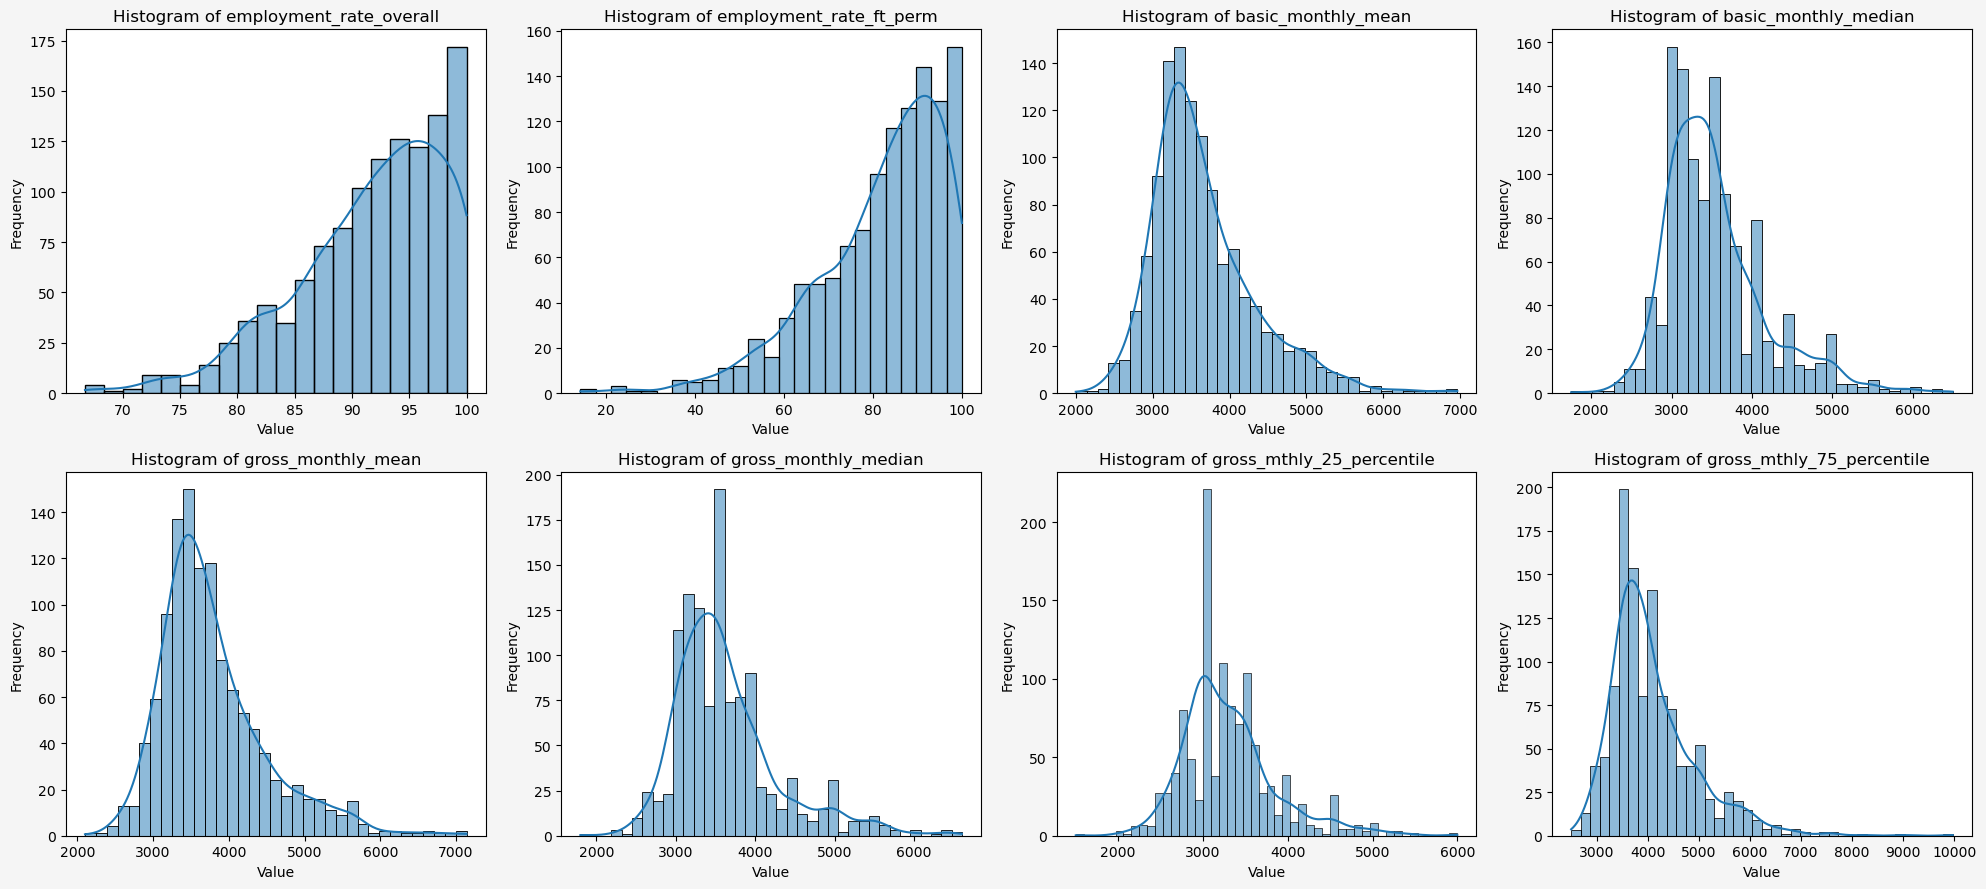

In [38]:
fig, axes = plt.subplots(2, 4, figsize=(20, 9), facecolor='whitesmoke')
axes = axes.flatten()

plot_histplots(survey_df)
plt.show()

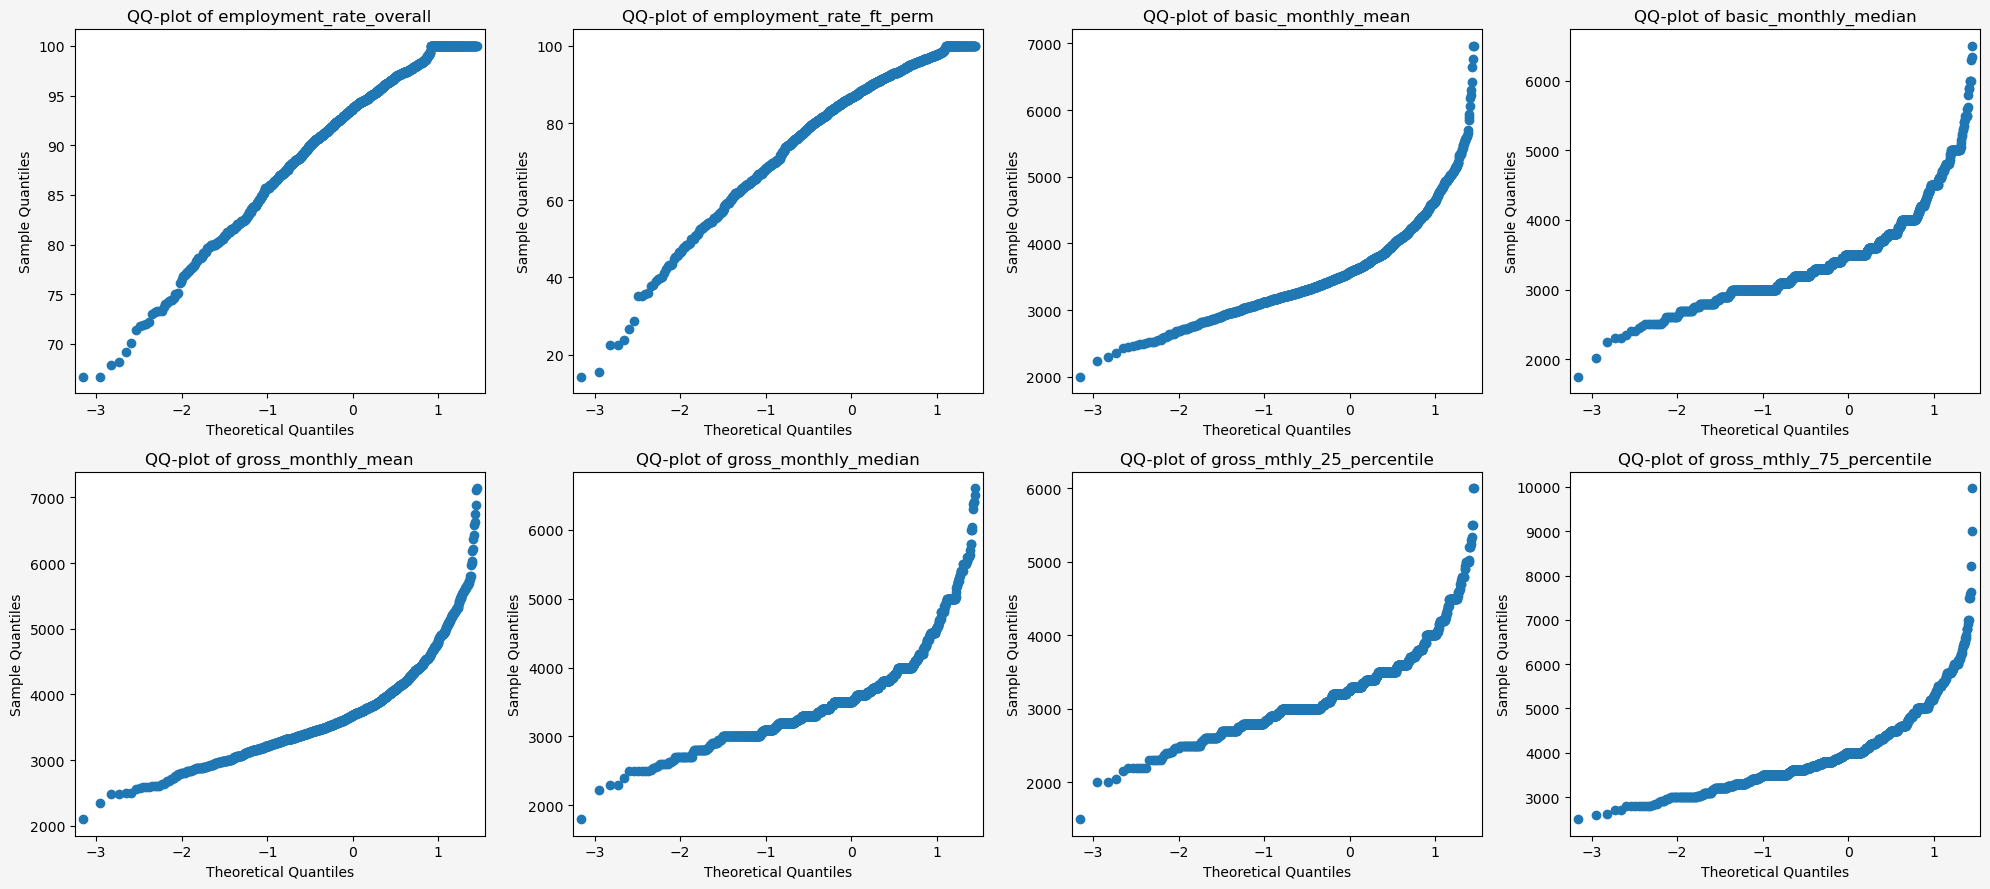

In [39]:
fig, axes = plt.subplots(2, 4, figsize=(20, 9), facecolor='whitesmoke')
axes = axes.flatten()

plot_qqplots(survey_df)
plt.show()

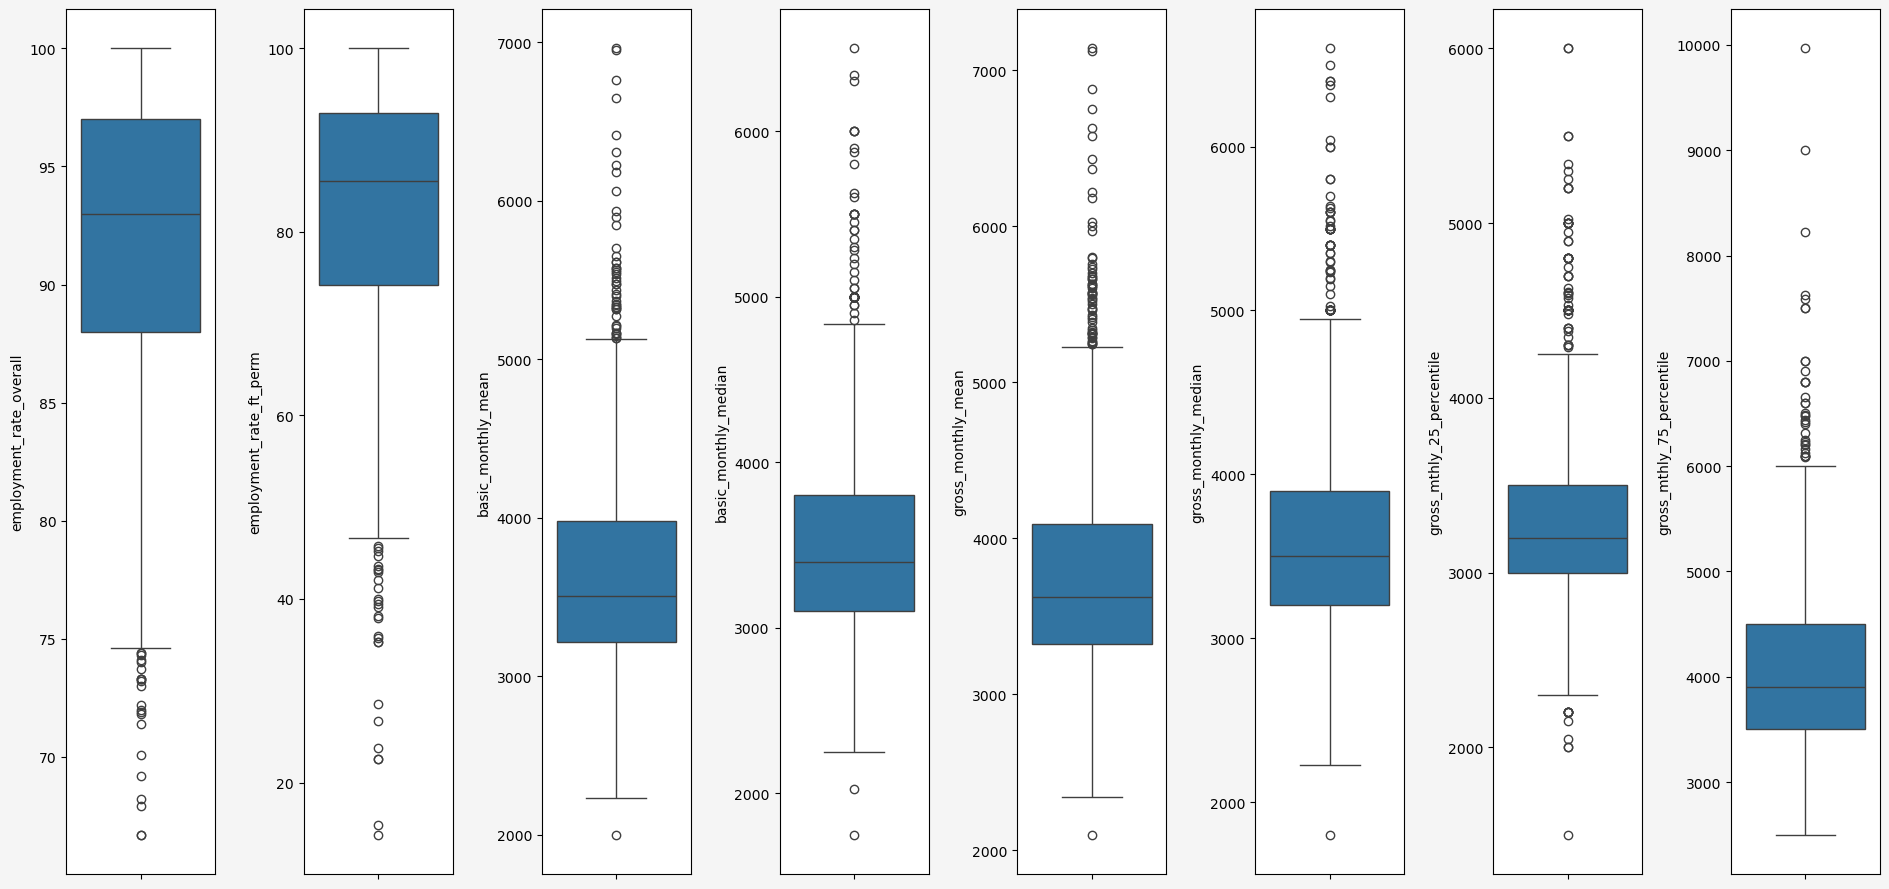

In [40]:
fig, axes = plt.subplots(1, 8, figsize=(19, 9), facecolor='whitesmoke')
axes = axes.flatten()

plot_boxplots(survey_df)
plt.show()

In [41]:
# Remove Outliers (ro)
ro_df = survey_df.copy()
valueCounts_df = pd.DataFrame()
for col in numerical_cols:
    column = ro_df[col]
        
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1 # Inter-quartile range
    
    lower_fence = Q1 - 1.5 * IQR # Values less than or more than the fence are considered outliers
    upper_fence = Q3 + 1.5 * IQR
    
    outliers = column[(column < lower_fence) | (column > upper_fence)]

    indices_to_drop = outliers.index[outliers.index.isin(ro_df.index)]
    
    if not indices_to_drop.empty:
        ro_df = ro_df.drop(indices_to_drop)

    valueCounts_df[col] = [len(indices_to_drop)]

    print(f"Outliers in {col}: {len(indices_to_drop)}")

Outliers in employment_rate_overall: 22
Outliers in employment_rate_ft_perm: 30
Outliers in basic_monthly_mean: 39
Outliers in basic_monthly_median: 25
Outliers in gross_monthly_mean: 22
Outliers in gross_monthly_median: 17
Outliers in gross_mthly_25_percentile: 12
Outliers in gross_mthly_75_percentile: 7


In [42]:
# Number of outliers in each column sorted
valueCounts_df.T.sort_values(by=0)

,0
gross_mthly_75_percentile,7
gross_mthly_25_percentile,12
gross_monthly_median,17
employment_rate_overall,22
gross_monthly_mean,22
basic_monthly_median,25
employment_rate_ft_perm,30
basic_monthly_mean,39


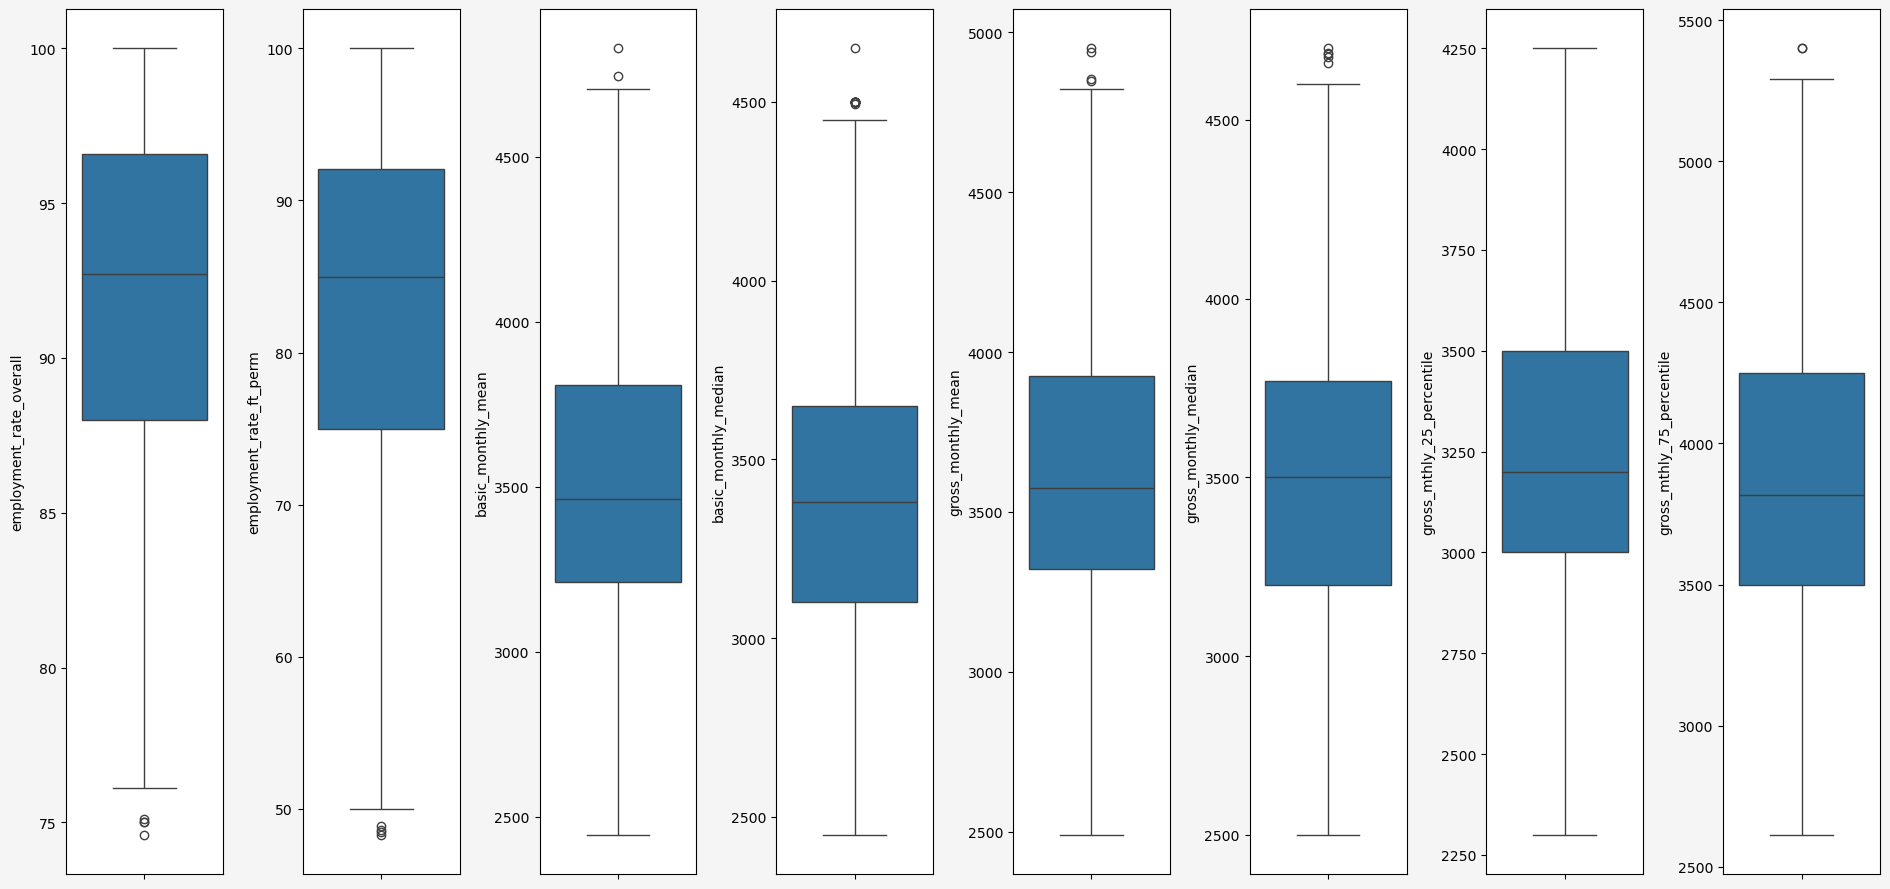

In [43]:
fig, axes = plt.subplots(1, 8, figsize=(19, 9), facecolor='whitesmoke')
axes = axes.flatten()

plot_boxplots(ro_df)

<li>There are significantly less outliers now</li>

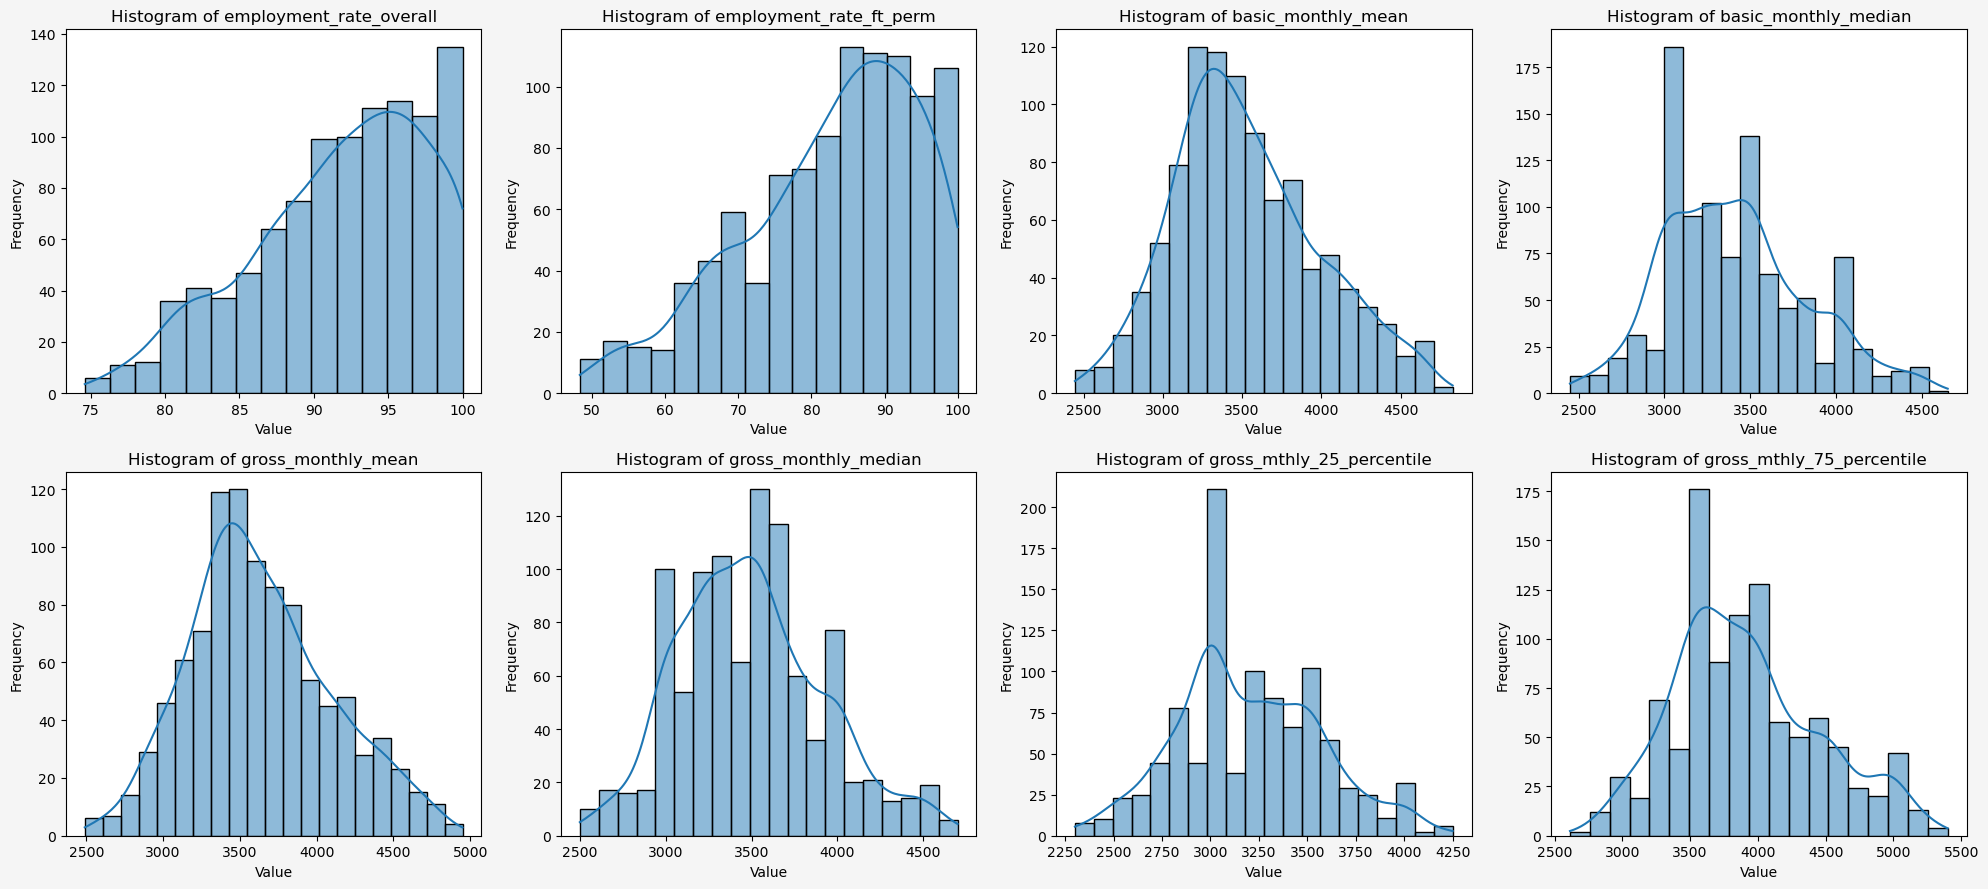

In [44]:
fig, axes = plt.subplots(2, 4, figsize=(20, 9), facecolor='whitesmoke')
axes = axes.flatten()

plot_histplots(ro_df)
plt.show()

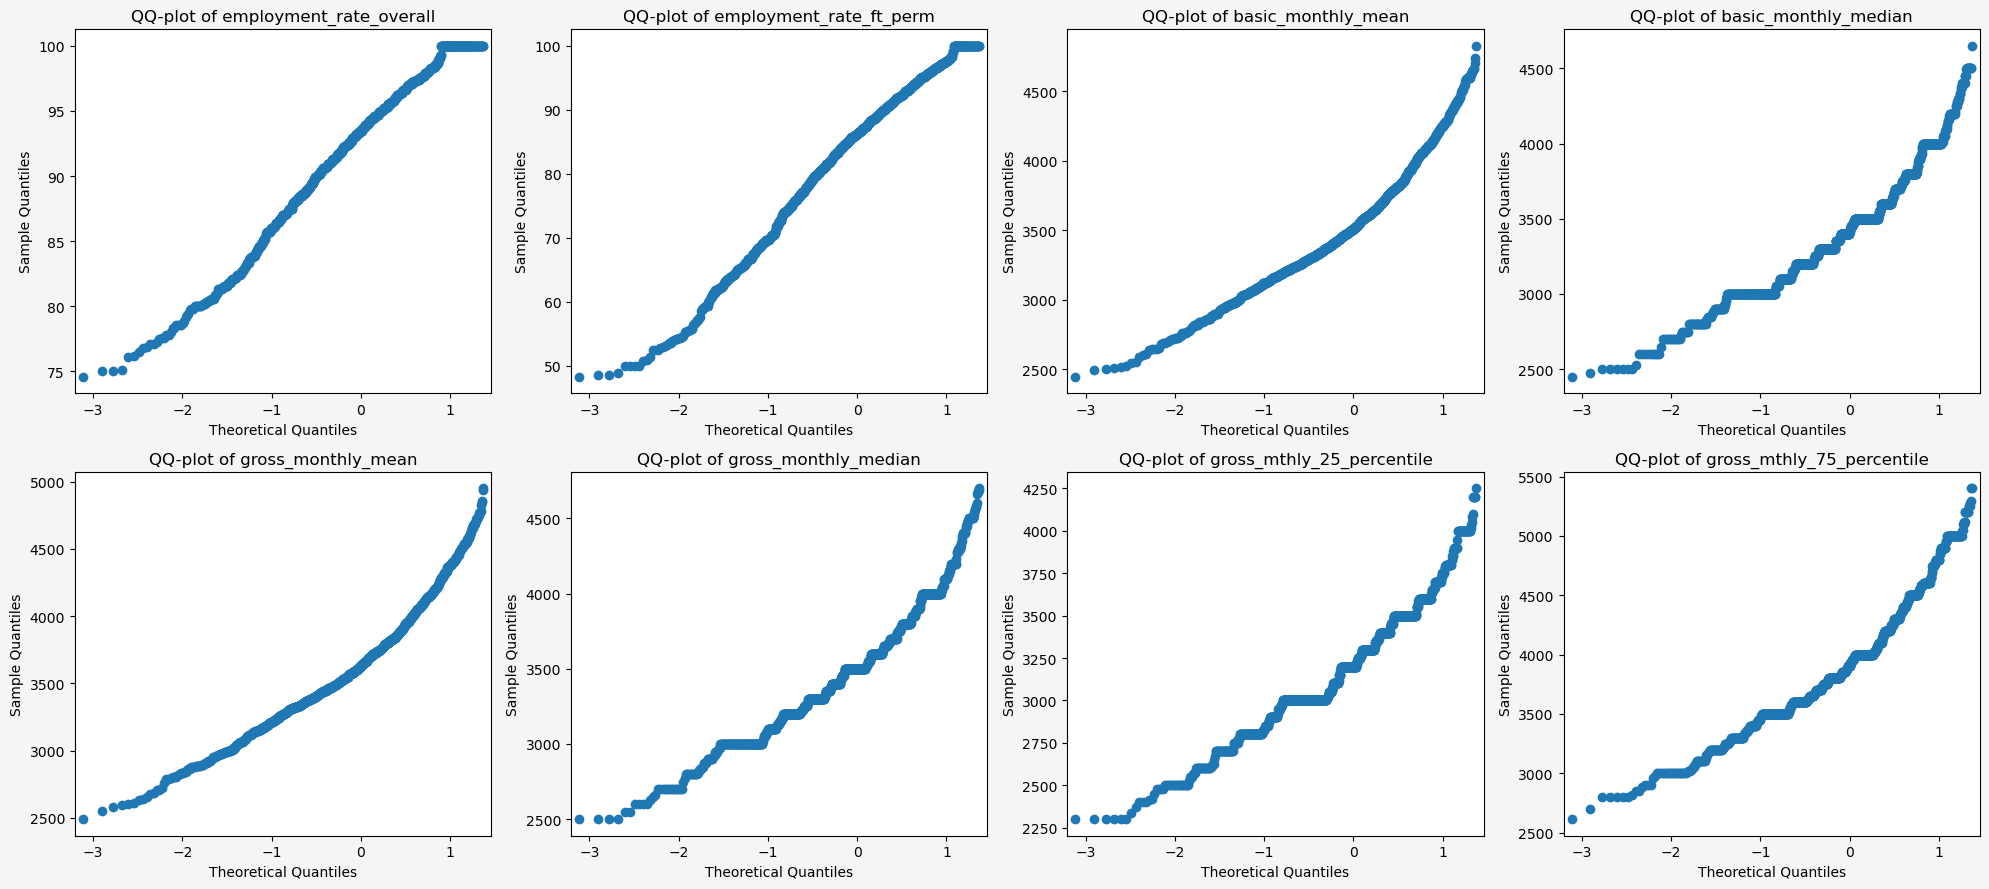

In [45]:
fig, axes = plt.subplots(2, 4, figsize=(20, 9), facecolor='whitesmoke')
axes = axes.flatten()

plot_qqplots(ro_df)
plt.show()

<li>Data is closer to normal distributions</li>

### Keywords Selection For Industry From Degree

In [46]:
industry_map = {
    "Engineering": [
        "Engineering", "Aerospace", "Civil", "Mechanical", "Electrical",
        "Chemical", "Biomedical", "Industrial", "Materials", "Environmental",
        "Naval", "Systems", "Architectural"
    ],
    "Business": [
        "Business", "Accountancy", "Finance", "Economics", "Management",
        "Marketing", "Supply Chain", "Entrepreneurship", "Tourism"
    ],
    "Technology": [
        "Computer", "IT", "Software", "Cyber", "Data", "Digital",
        "Computing", "AI", "Artificial Intelligence", "Analytics", "Infocomm"
    ],
    "Healthcare": [
        "Medicine", "Nursing", "Dentistry", "Pharmacy", "Clinical", "Health"
    ],
    "Law": [
        "Law", "Legal", "Juris", "LLB", "JD", "LLM"
    ],
    "Social": [
        "Social", "Psychology", "Sociology", "Political", "International Relations",
        "Behavioural"
    ],
    "Arts": [
        "Design", "Fine Arts", "Media", "Animation", "Film", "Theatre", "Music",
        "Visual", "Creative", "Architecture"
    ],
    "Science": [
        "Biology", "Chemistry", "Physics", "Mathematics", "Environmental Science", "Science"
    ],
    "Education": [
        "Education", "Teaching", "Pedagogy"
    ],
    "Hospitality": [
        "Hospitality", "Tourism", "Culinary", "Food"
    ],
    "Security": [
        "Criminology", "Criminal Justice", "Criminal", "Policing", "Public Safety",
        "Forensics", "Security", "Counterterrorism", "Investigations", "Law Enforcement", "Crime Prevention", "Safety"
    ]
}

def create_industry(value):
  global industry_map

  degree_list = value.lower().split(' ')

  for key, keywords_list in industry_map.items():
    for keyword in keywords_list:
      if keyword.lower() in degree_list:
        return key
      
      if len(keyword.split(' ')) > 1:
        if keyword.lower() in value.lower():
          return key

  ## Unable to group
  return np.nan

survey_df['Industry'] = survey_df['degree'].apply(create_industry)
survey_df.info()
survey_df['Industry']

<class 'pandas.core.frame.DataFrame'>
Index: 1262 entries, 0 to 1261
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       1262 non-null   object 
 1   university                 1262 non-null   object 
 2   school                     1230 non-null   object 
 3   degree                     1262 non-null   object 
 4   employment_rate_overall    1170 non-null   float64
 5   employment_rate_ft_perm    1170 non-null   float64
 6   basic_monthly_mean         1170 non-null   Int64  
 7   basic_monthly_median       1170 non-null   Int64  
 8   gross_monthly_mean         1170 non-null   Int64  
 9   gross_monthly_median       1170 non-null   Int64  
 10  gross_mthly_25_percentile  1170 non-null   Int64  
 11  gross_mthly_75_percentile  1170 non-null   Int64  
 12  Industry                   1094 non-null   object 
dtypes: Int64(6), float64(2), object(5)
memory usage: 177.

0          Business
1          Business
2          Business
3          Business
           ...     
1258    Engineering
1259    Engineering
1260       Business
1261       Security
Name: Industry, Length: 1262, dtype: object

# OLS

In [47]:
def plot_ols(x_col, y_col, df):
    model = smf.ols(f'{y_col} ~ {x_col}', data=df.dropna()).fit_regularized(method='elastic_net', alpha=0.5)
    print(model.params)

    plt.figure(figsize=(5,4))
    sns.scatterplot(data = df, x=x_col, y=y_col)
    x = np.array(df[x_col])
    y = model.params[x_col] * x + model.params.Intercept
    plt.plot(x, y, c='r')
    plt.ylim(65, 101)
    plt.show()

Intercept             70.761129
gross_monthly_mean     0.005539
dtype: float64


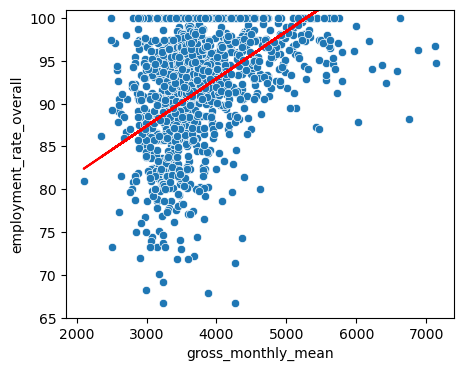

In [48]:
plot_ols('gross_monthly_mean', 'employment_rate_overall', survey_df)

Intercept               70.614237
gross_monthly_median     0.005828
dtype: float64


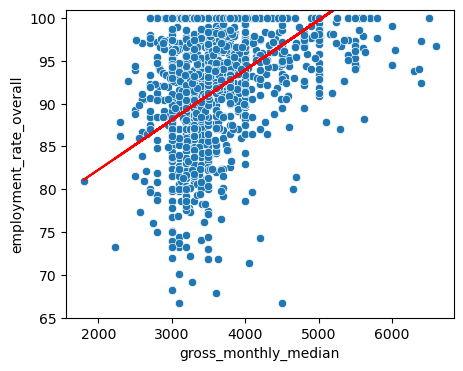

In [49]:
plot_ols('gross_monthly_median', 'employment_rate_overall', survey_df)

Intercept                    68.087392
gross_mthly_25_percentile     0.007198
dtype: float64


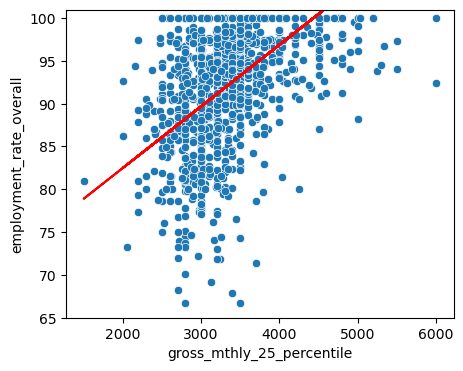

In [50]:
plot_ols('gross_mthly_25_percentile', 'employment_rate_overall', survey_df)

Intercept                    54.608732
gross_mthly_75_percentile     0.006810
dtype: float64


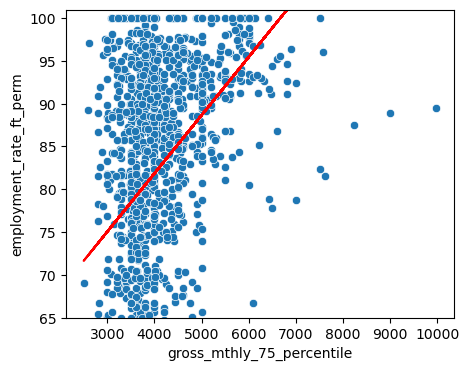

In [51]:
plot_ols('gross_mthly_75_percentile', 'employment_rate_ft_perm', survey_df)

Intercept             70.677203
basic_monthly_mean     0.005746
dtype: float64


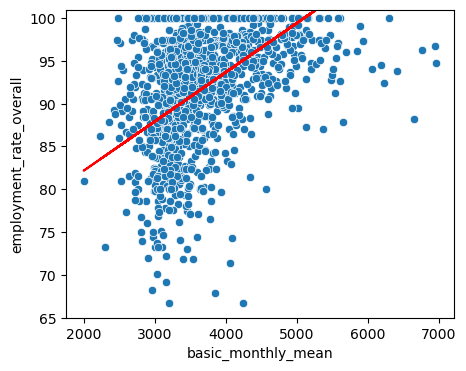

In [52]:
plot_ols('basic_monthly_mean', 'employment_rate_overall', survey_df)

Intercept               70.005942
basic_monthly_median     0.006165
dtype: float64


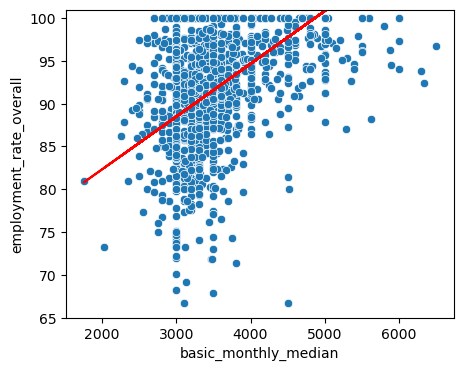

In [60]:
plot_ols('basic_monthly_median', 'employment_rate_overall', survey_df)

# Plot by Industry

In [53]:
by_industry = survey_df.dropna()
by_industry

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile,Industry
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000,Business
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700,2700,2900,Business
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000,2700,3500,Business
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400,3000,4100,Business
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,2022,Singapore Institute of Technology,Technische Universität München,Bachelor of Science in Chemical Engineering,94.1,85.3,3704,3600,4002,3950,3600,4300,Engineering
1259,2022,Singapore Institute of Technology,Technische Universität München,Bachelor of Science in Electrical Engineering ...,95.0,85.0,4522,4200,4606,4280,4000,4800,Engineering
1260,2022,Singapore Institute of Technology,The Culinary Institute of America,Bachelor of Business Administration in Food Bu...,89.5,78.9,2609,2450,2969,3050,2300,3500,Business
1261,2022,Singapore Institute of Technology,University of Liverpool,Bachelor of Arts with Honours in Criminology a...,90.5,85.7,4278,4050,4533,4561,4000,5293,Security


In [64]:
gmmean_by_industry = by_industry.groupby('Industry')[['basic_monthly_mean', 'basic_monthly_median', 'gross_monthly_mean', 'gross_monthly_median', 'gross_mthly_25_percentile', 'gross_mthly_75_percentile']].mean()
gmmean_by_industry

,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
Industry,,,,,,
Arts,2931.536585,2854.097561,2999.609756,2896.341463,2634.902439,3231.658537
Business,3745.075472,3441.372642,3857.273585,3514.424528,3155.349057,4158.226415
Education,2972.666667,3033.333333,3010.0,3066.666667,2833.333333,3151.333333
Engineering,3661.280749,3561.893048,3788.673797,3663.962567,3346.513369,4107.470588
...,...,...,...,...,...,...
Science,3472.417647,3406.064706,3590.582353,3495.629412,3228.311765,3867.041176
Security,3838.0,3736.571429,3994.0,3933.571429,3458.571429,4429.0
Social,3445.351852,3346.37037,3549.444444,3419.62963,3106.055556,3815.37037
Technology,4035.416667,3913.833333,4107.666667,3974.416667,3554.958333,4474.25


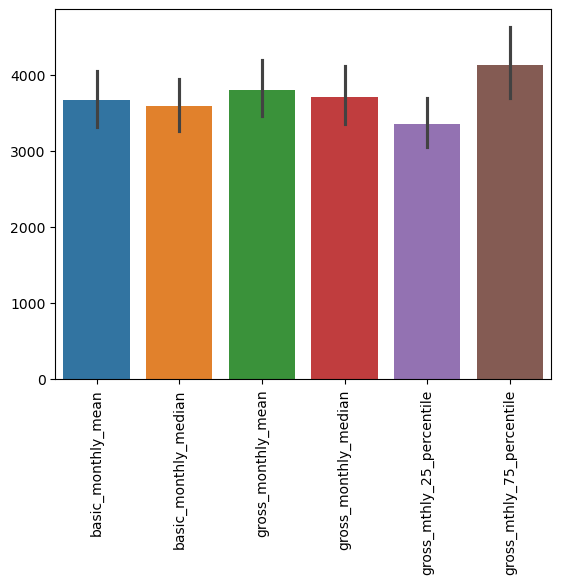

In [68]:
sns.barplot(gmmean_by_industry)
plt.xticks(rotation=90)
plt.show()

In [56]:
gmmean_by_yearIndustry = by_industry.pivot_table(values='gross_monthly_mean', index=['year', 'Industry'], aggfunc='mean')
gmmean_by_yearIndustry

gross_monthly_mean
year Industry                       
2013 Arts                     2638.0
     Business               3379.375
     Engineering         3279.772727
     Healthcare               4741.0
...                              ...
2022 Science             4251.157895
     Security                 4533.0
     Social              4049.142857
     Technology          5555.777778

[94 rows x 1 columns]

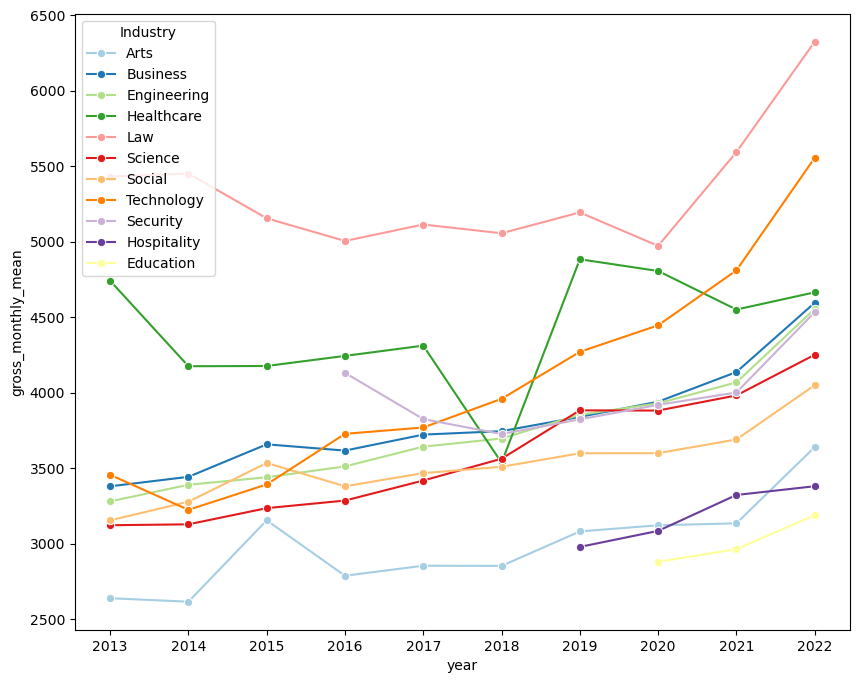

In [57]:
plt.figure(figsize=(10,8))
sns.lineplot(data=gmmean_by_yearIndustry, x="year", y="gross_monthly_mean", hue="Industry", marker="o", palette='Paired')
plt.show()

In [58]:
ftEmployRate_by_yearIndustry = by_industry.pivot_table(values='employment_rate_ft_perm', index=['year', 'Industry'], aggfunc='mean')
ftEmployRate_by_yearIndustry

employment_rate_ft_perm
year Industry                            
2013 Arts                       61.400000
     Business                   88.437500
     Engineering                86.272727
     Healthcare                100.000000
...                                   ...
2022 Science                    89.810526
     Security                   85.700000
     Social                     77.200000
     Technology                 86.155556

[94 rows x 1 columns]

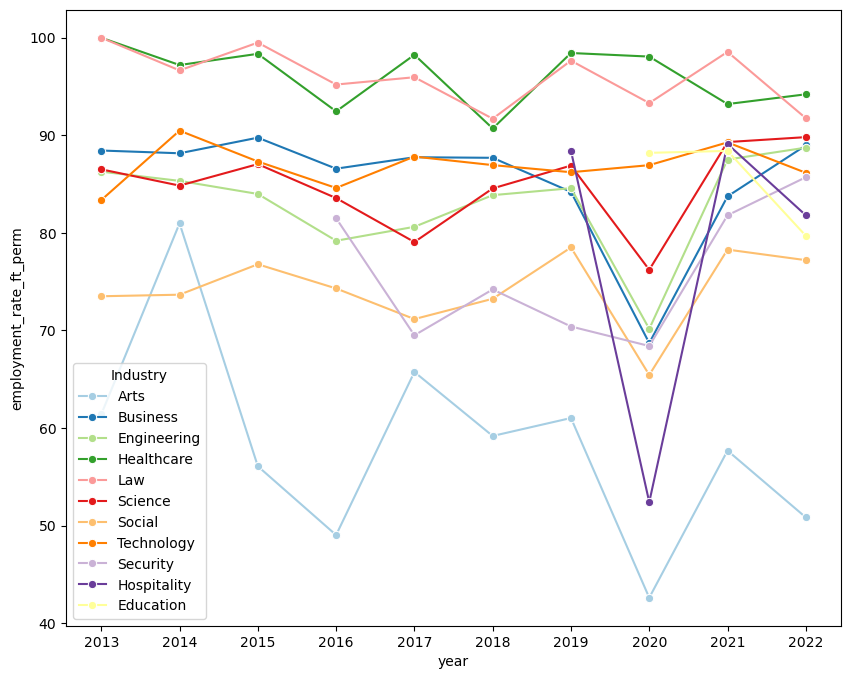

In [59]:
plt.figure(figsize=(10,8))
sns.lineplot(data=ftEmployRate_by_yearIndustry, x="year", y="employment_rate_ft_perm", hue="Industry", marker="o", palette='Paired')
plt.show()